# Import necessary libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Iris dataset

In [10]:
iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Autoencoder models

In [11]:
def create_autoencoder(activation='linear'):
    model = Sequential()
    model.add(Dense(3, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(X_train.shape[1], activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Linear Autoencoder
linear_autoencoder = create_autoencoder('linear')
history_linear = linear_autoencoder.fit(X_train, X_train, epochs=50, batch_size=8, validation_data=(X_test, X_test), verbose=0)

# Sigmoid-based Non-linear Autoencoder
sigmoid_autoencoder = create_autoencoder('sigmoid')
history_sigmoid = sigmoid_autoencoder.fit(X_train, X_train, epochs=50, batch_size=8, validation_data=(X_test, X_test), verbose=0)

# ReLU-based Non-linear Autoencoder
relu_autoencoder = create_autoencoder('relu')
history_relu = relu_autoencoder.fit(X_train, X_train, epochs=50, batch_size=8, validation_data=(X_test, X_test), verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Plotting PCA variance

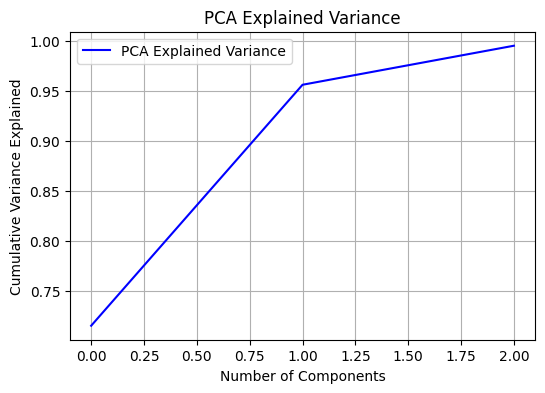

In [12]:
plt.figure(figsize=(6, 4))
pca_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_variance, label='PCA Explained Variance', color='b')
plt.title('PCA Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Loss for Linear Autoencoder

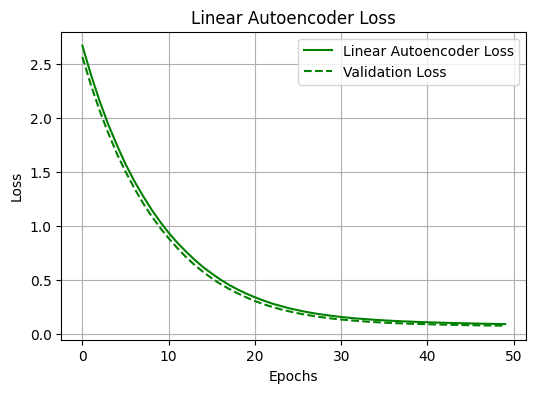

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(history_linear.history['loss'], label='Linear Autoencoder Loss', color='g')
plt.plot(history_linear.history['val_loss'], label='Validation Loss', linestyle='--', color='g')
plt.title('Linear Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Loss for Sigmoid-based Autoencoder

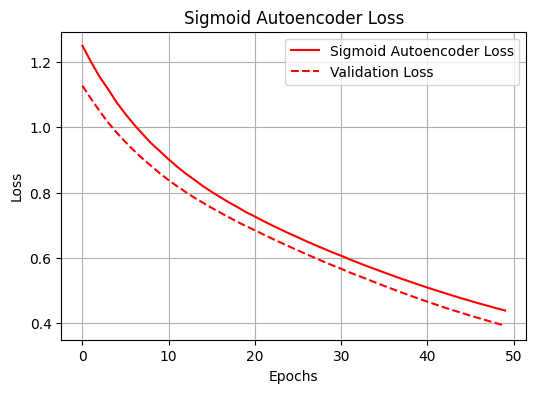

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Autoencoder Loss', color='r')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss', linestyle='--', color='r')
plt.title('Sigmoid Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Loss for ReLU-based Autoencoder

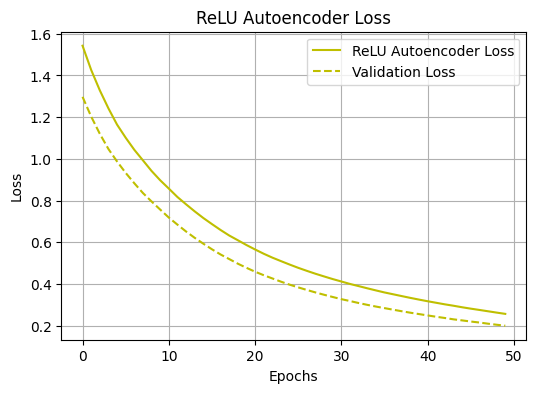

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(history_relu.history['loss'], label='ReLU Autoencoder Loss', color='y')
plt.plot(history_relu.history['val_loss'], label='Validation Loss', linestyle='--', color='y')
plt.title('ReLU Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

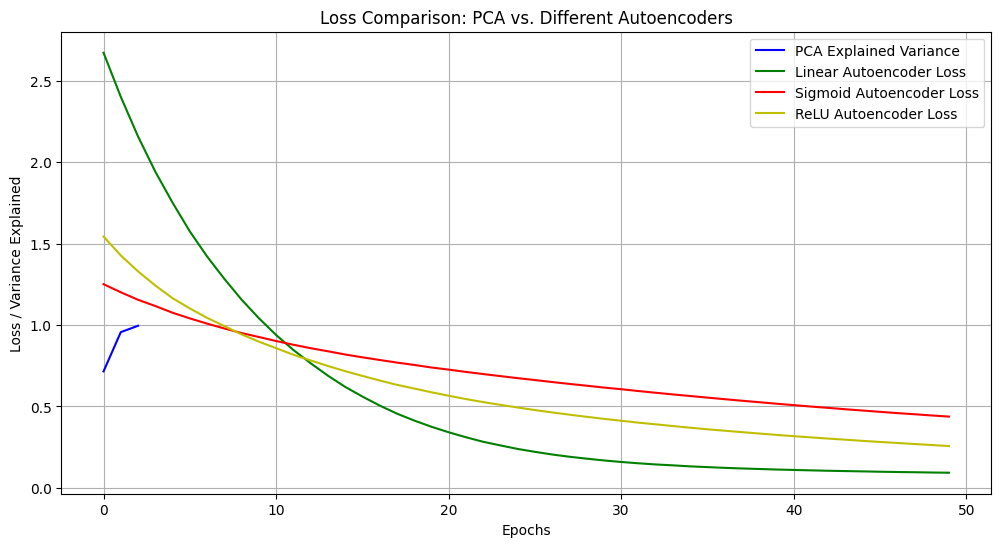

In [16]:
plt.figure(figsize=(12, 6))

pca_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_variance, label='PCA Explained Variance', color='b')

plt.plot(history_linear.history['loss'], label='Linear Autoencoder Loss', color='g')
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Autoencoder Loss', color='r')
plt.plot(history_relu.history['loss'], label='ReLU Autoencoder Loss', color='y')

plt.title('Loss Comparison: PCA vs. Different Autoencoders')
plt.xlabel('Epochs')
plt.ylabel('Loss / Variance Explained')
plt.legend()
plt.grid(True)
plt.show()